/Users/hj/Documents/DataAnalysisProject/22-1_DataAnalysis
['2019년 01월' '2019년 02월' '2019년 03월' '2019년 04월' '2019년 05월' '2019년 06월'
 '2019년 07월' '2019년 08월' '2019년 09월' '2019년 10월' '2019년 11월' '2019년 12월'
 '2020년 01월' '2020년 02월' '2020년 03월' '2020년 04월' '2020년 05월' '2020년 06월'
 '2020년 07월' '2020년 08월' '2020년 09월' '2020년 10월' '2020년 11월' '2020년 12월'
 '2021년 01월' '2021년 02월' '2021년 03월' '2021년 04월' '2021년 05월' '2021년 06월'
 '2021년 07월' '2021년 08월' '2021년 09월']
./Data/감기(2019.01~2021.12).xls
./Data/폐렴(2019.01~2021.12).xls
./Data/호흡계통의 질환(2019.01~2021.12).xls
./Data/우울증(2019.01~2021.12).xls
./Data/정신 및 행동장애(2019.01~2021.12).xls
./Data/비만(2019.01~2021.12).xls
./Data/접촉피부염(2019.01~2021.12).xls
./Data/일자목거북목증후군(2019.01~2021.12).xls
./Data/알레르기성결막염(2019.01~2021.12).xls
[3362916 2613438 3338066 3896231 3357273 2455861 2361740 2124206 2978622
 3529314 3677544 4122451 3994101 2534144 1524877 1217599 1488861 1524450
 1455694 1226148 1476993 1704553 2018642 1455018 1003359 1033288 1670240
 1905291 15

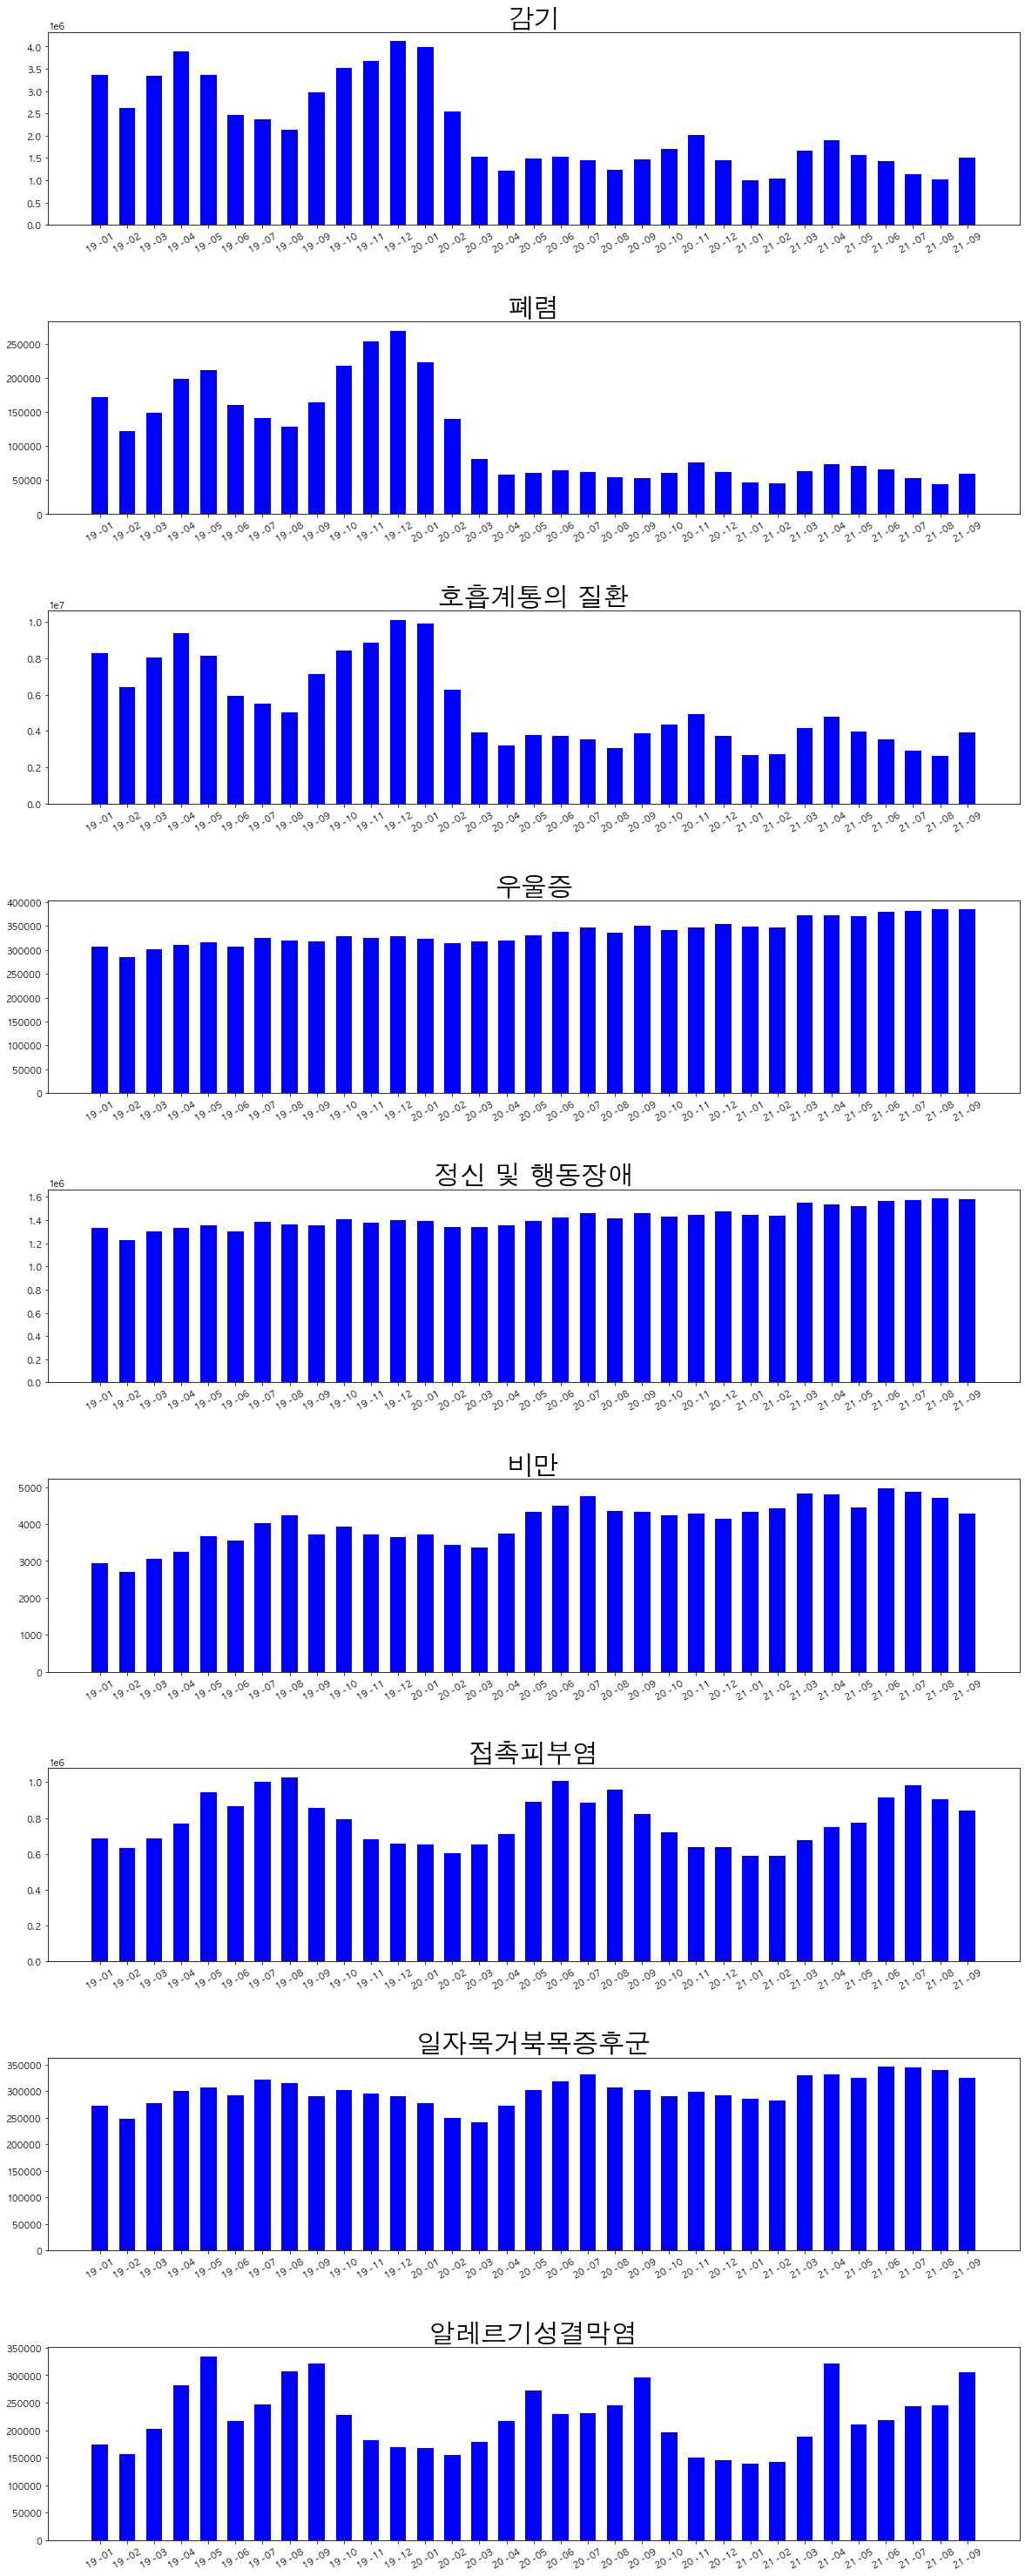

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import platform
from matplotlib import font_manager, rc

print(os.getcwd())

directory = "./Data/"
datasetNames = ["감기", "폐렴", "호흡계통의 질환", "우울증", "정신 및 행동장애", 
                "비만", "접촉피부염", "일자목거북목증후군", "알레르기성결막염"]
postfixName = "(2019.01~2021.12).xls"

columns = ["환자수", "내원일수", "청구건수", "요양급여비용총액", "보험자부담금"]

# file_name = directory + datasetNames[7] + postfixName
# print(file_name)
# df = pd.read_excel(file_name, header=None)
# print(df.shape)
# print(df.loc[8:, df.loc[7] == columns[0]]) # 환자수만 뽑기

fileName = directory + datasetNames[7] + postfixName
temp = pd.read_excel(fileName, header=None)
dataTimes = temp.loc[6, 3:].unique()

print(dataTimes)

patientData = dict()

for a in range(len(datasetNames)):
    file_name = directory + datasetNames[a] + postfixName
    print(file_name)
    df = pd.read_excel(file_name, header=None, thousands = ',')
    df = df.replace("-", 0)
    #print(df.loc[8:, df.loc[7] == columns[0]]) # 환자수만 뽑기
    for i in range(3, 164, 5):
        df.loc[8: , i] = pd.to_numeric(df.loc[8:, i])
        #print(df.loc[8:, i])
    data = pd.DataFrame(df.loc[8:, df.loc[7] == columns[0]].values, columns=dataTimes)
    patientData[datasetNames[a]] = data

# for a in datasetNames:
#     print(patientData[a])
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family=font_name)

    
'''
환자수 데이터
기간내 전체 환자수 막대 그래프
'''
n = 1
plt.figure(figsize = (20,50))
for a in datasetNames:
    print(patientData[a].values[0,:])
    ax = plt.subplot(9,1,n)
    ax.bar(np.arange(len(dataTimes)),patientData[a].values[0,:], width=0.6, color = 'blue')
    plt.xticks(np.arange(len(dataTimes)), [a[2:4]+" -"+a[6:8] for a in dataTimes], fontsize=10, rotation=30)
    ax.set_title(a, fontsize = 30)
    n+=1
    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()




./Data/감기(2019.01~2021.12).xls
(9, 33)


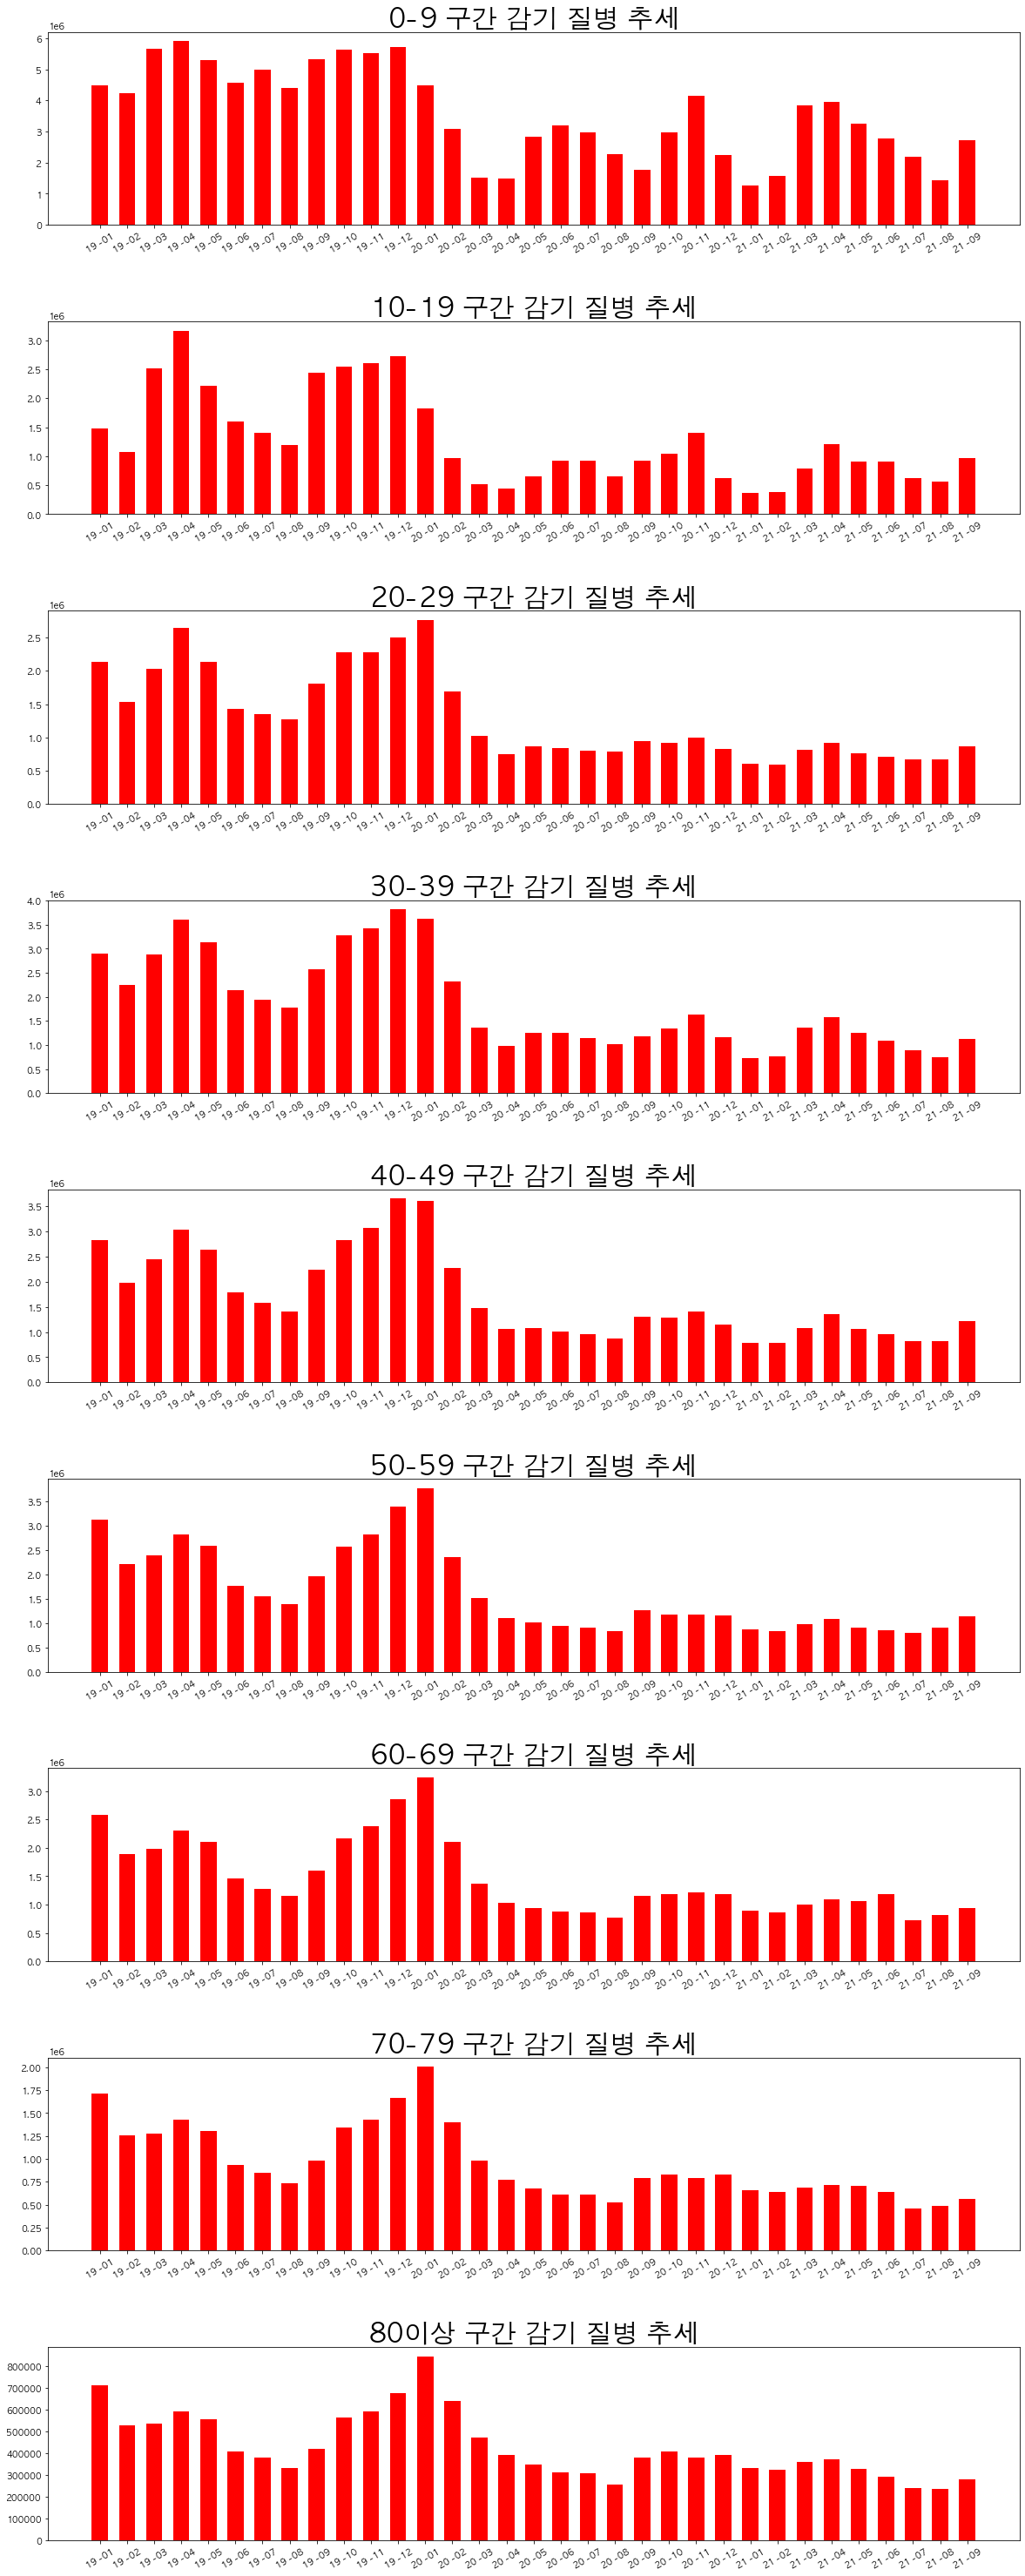

(9, 33)


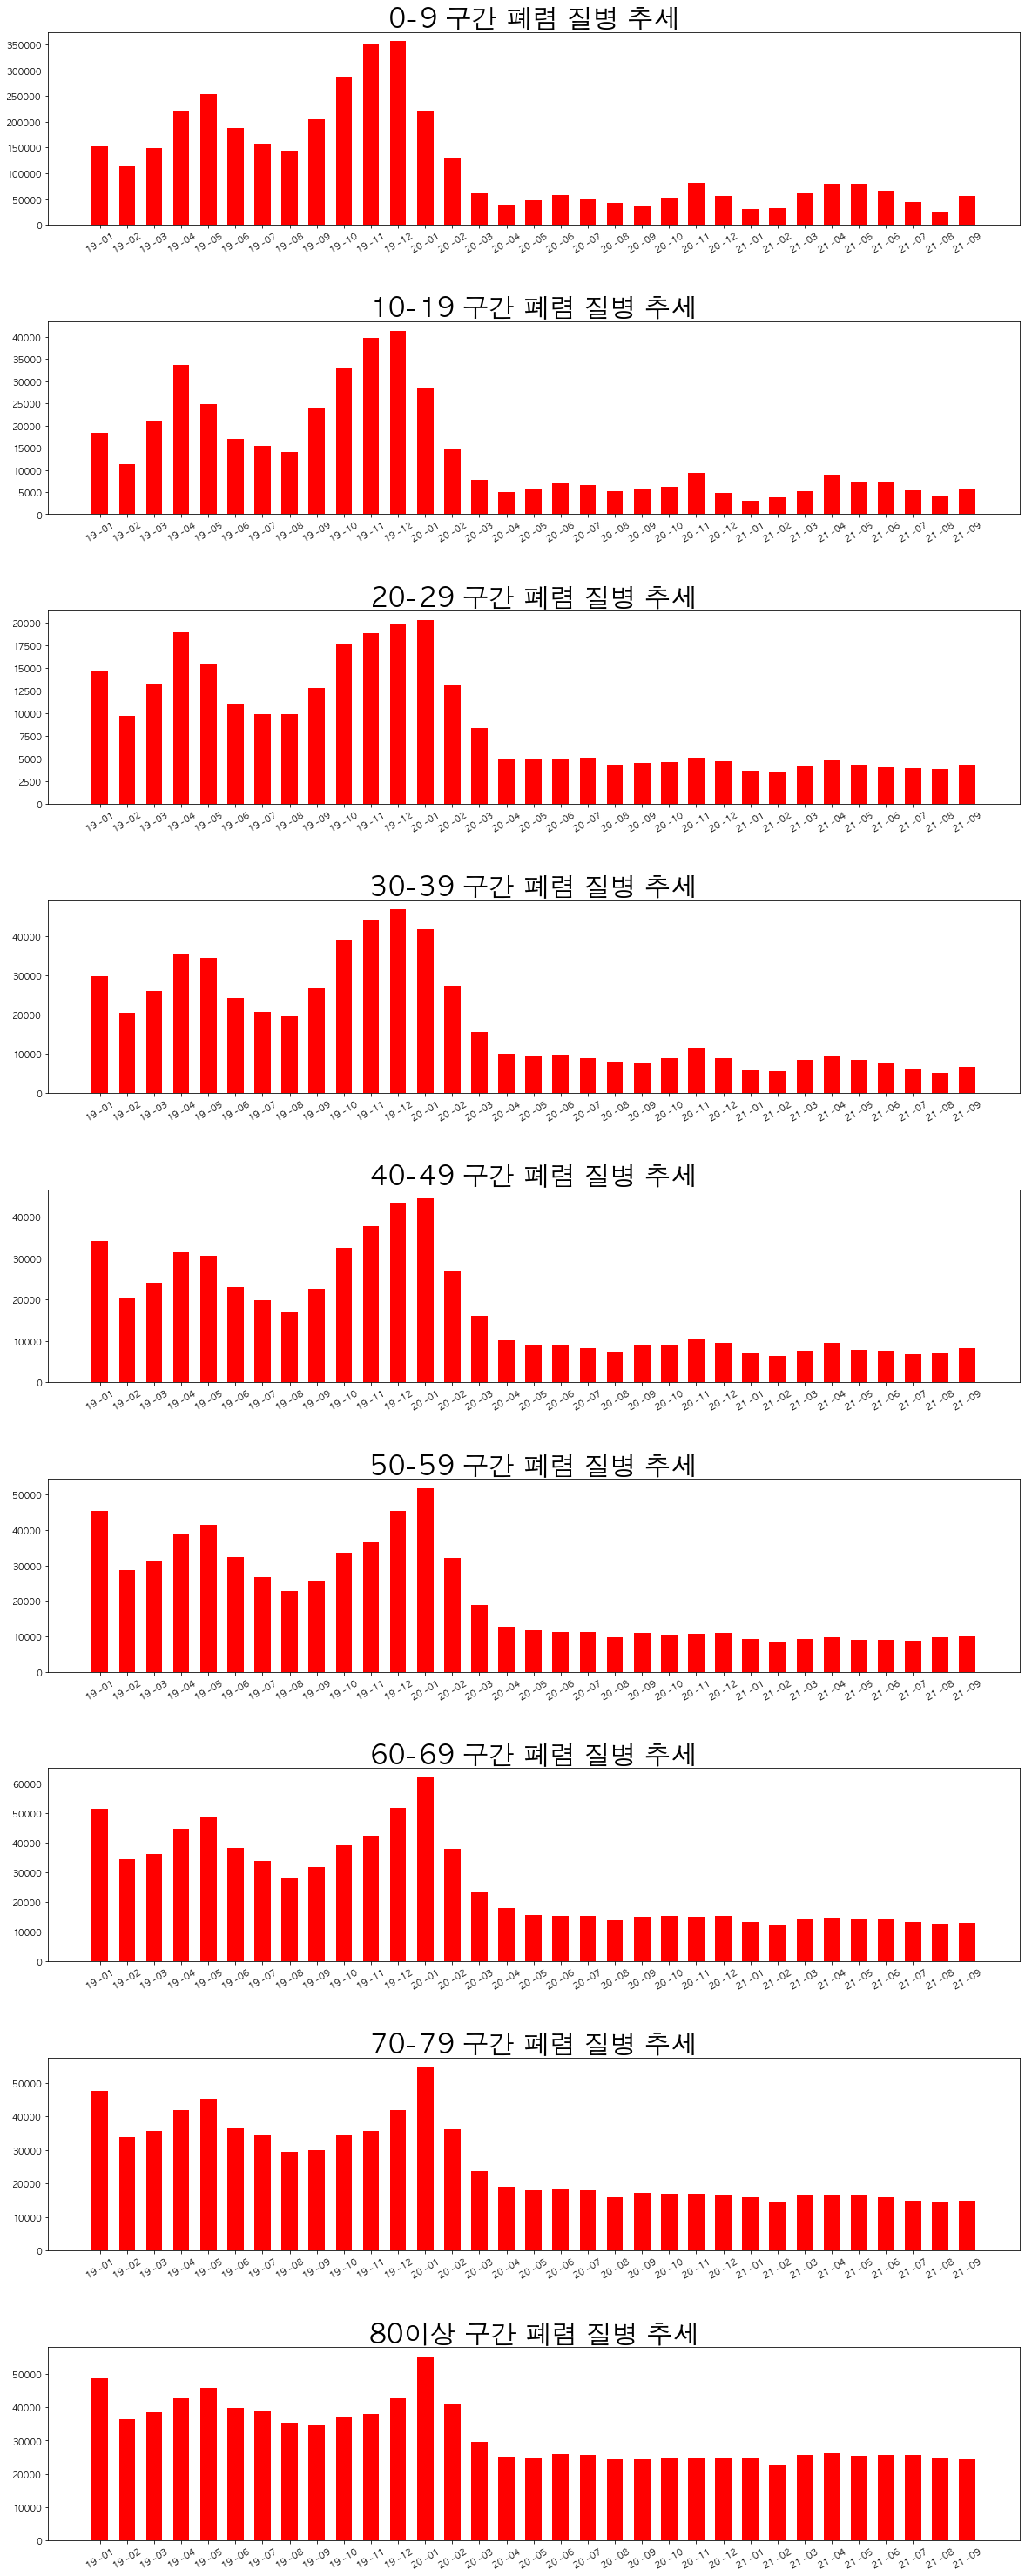

(9, 33)


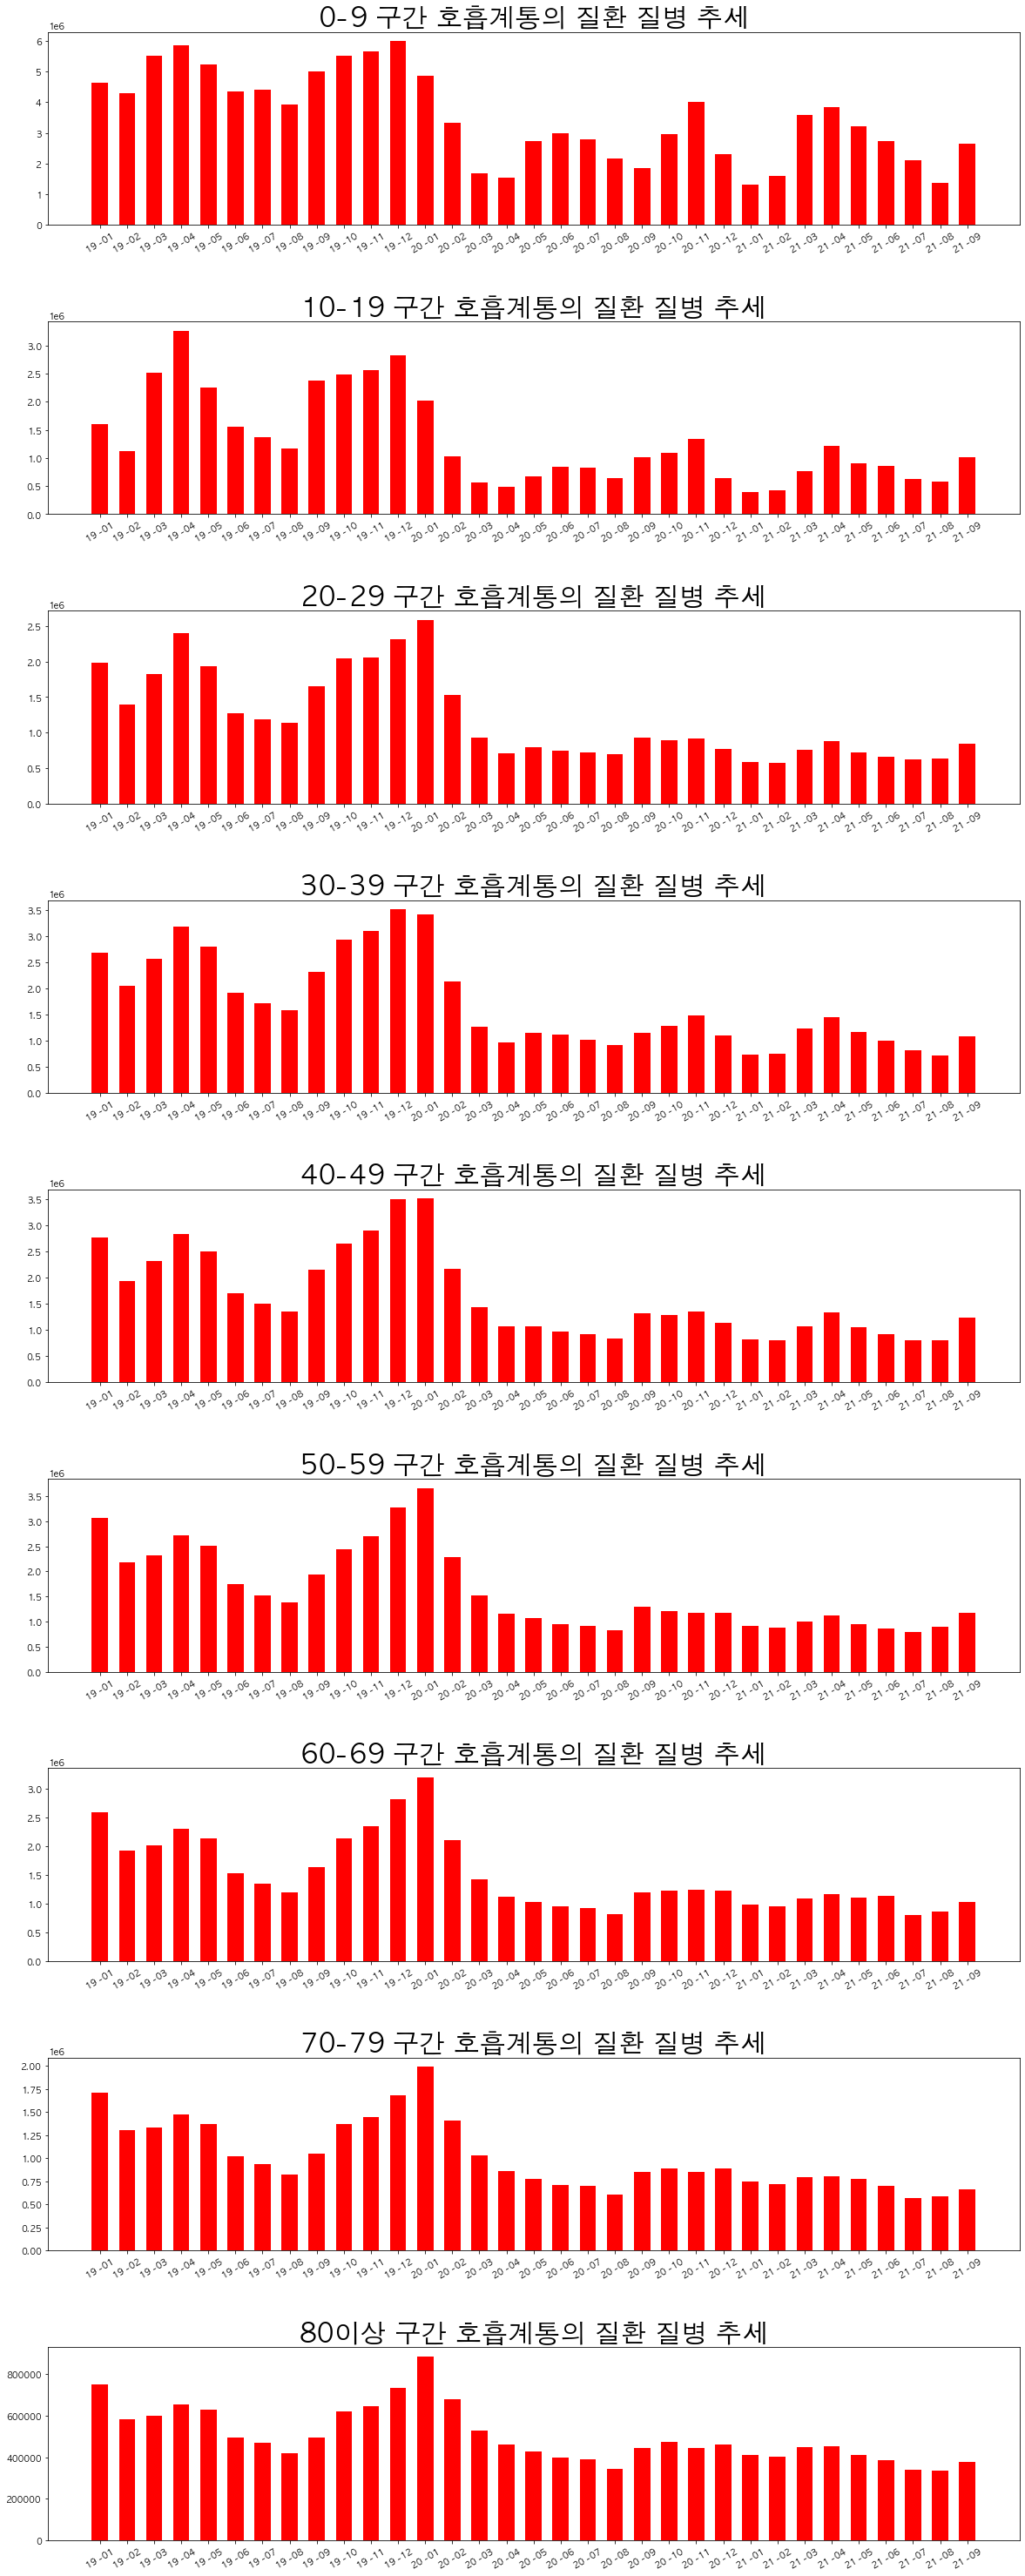

(9, 33)


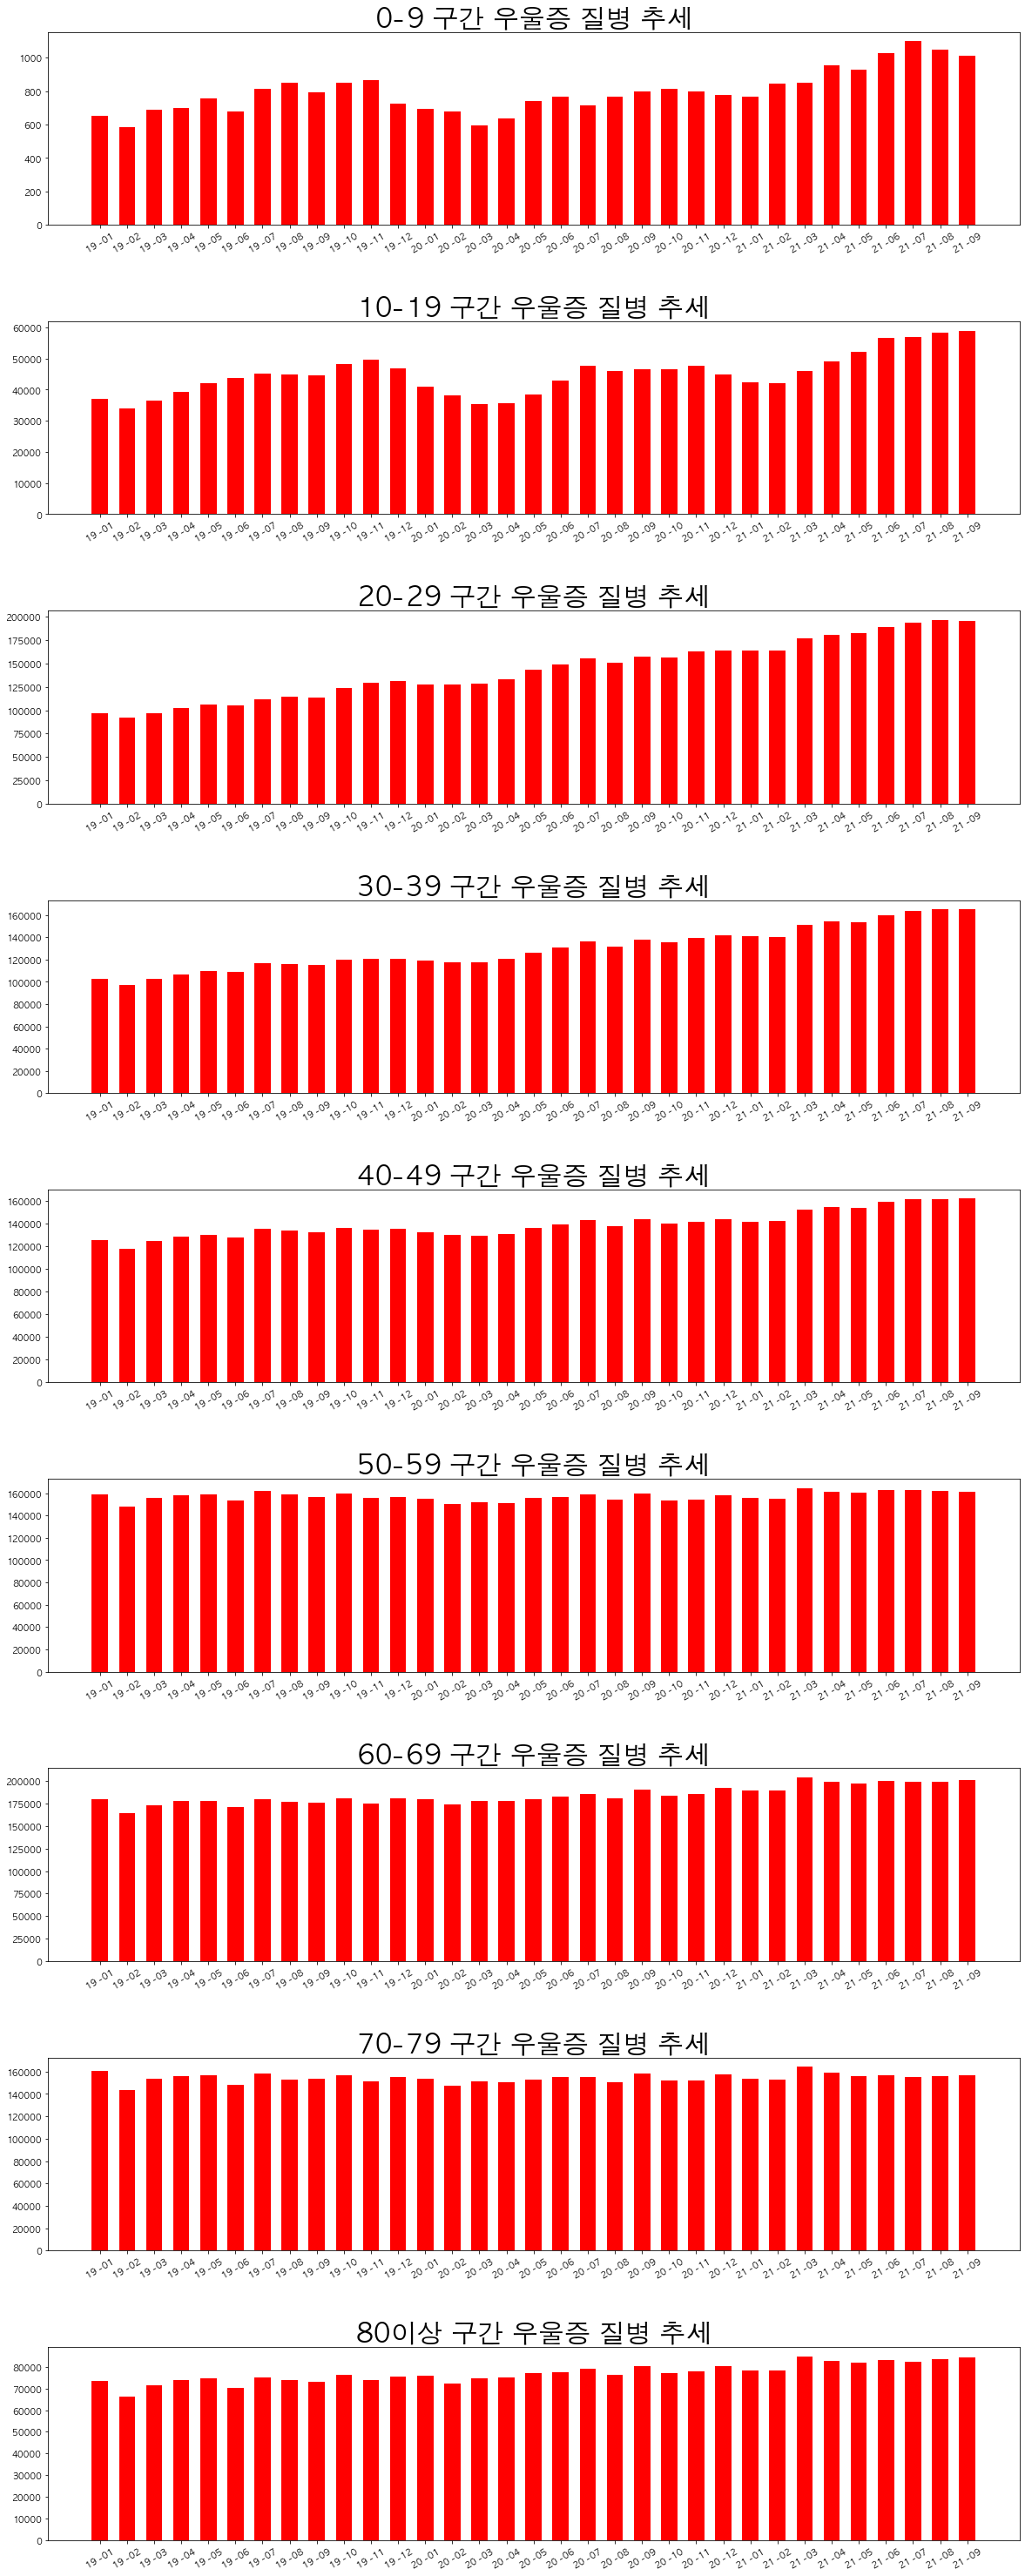

(9, 33)


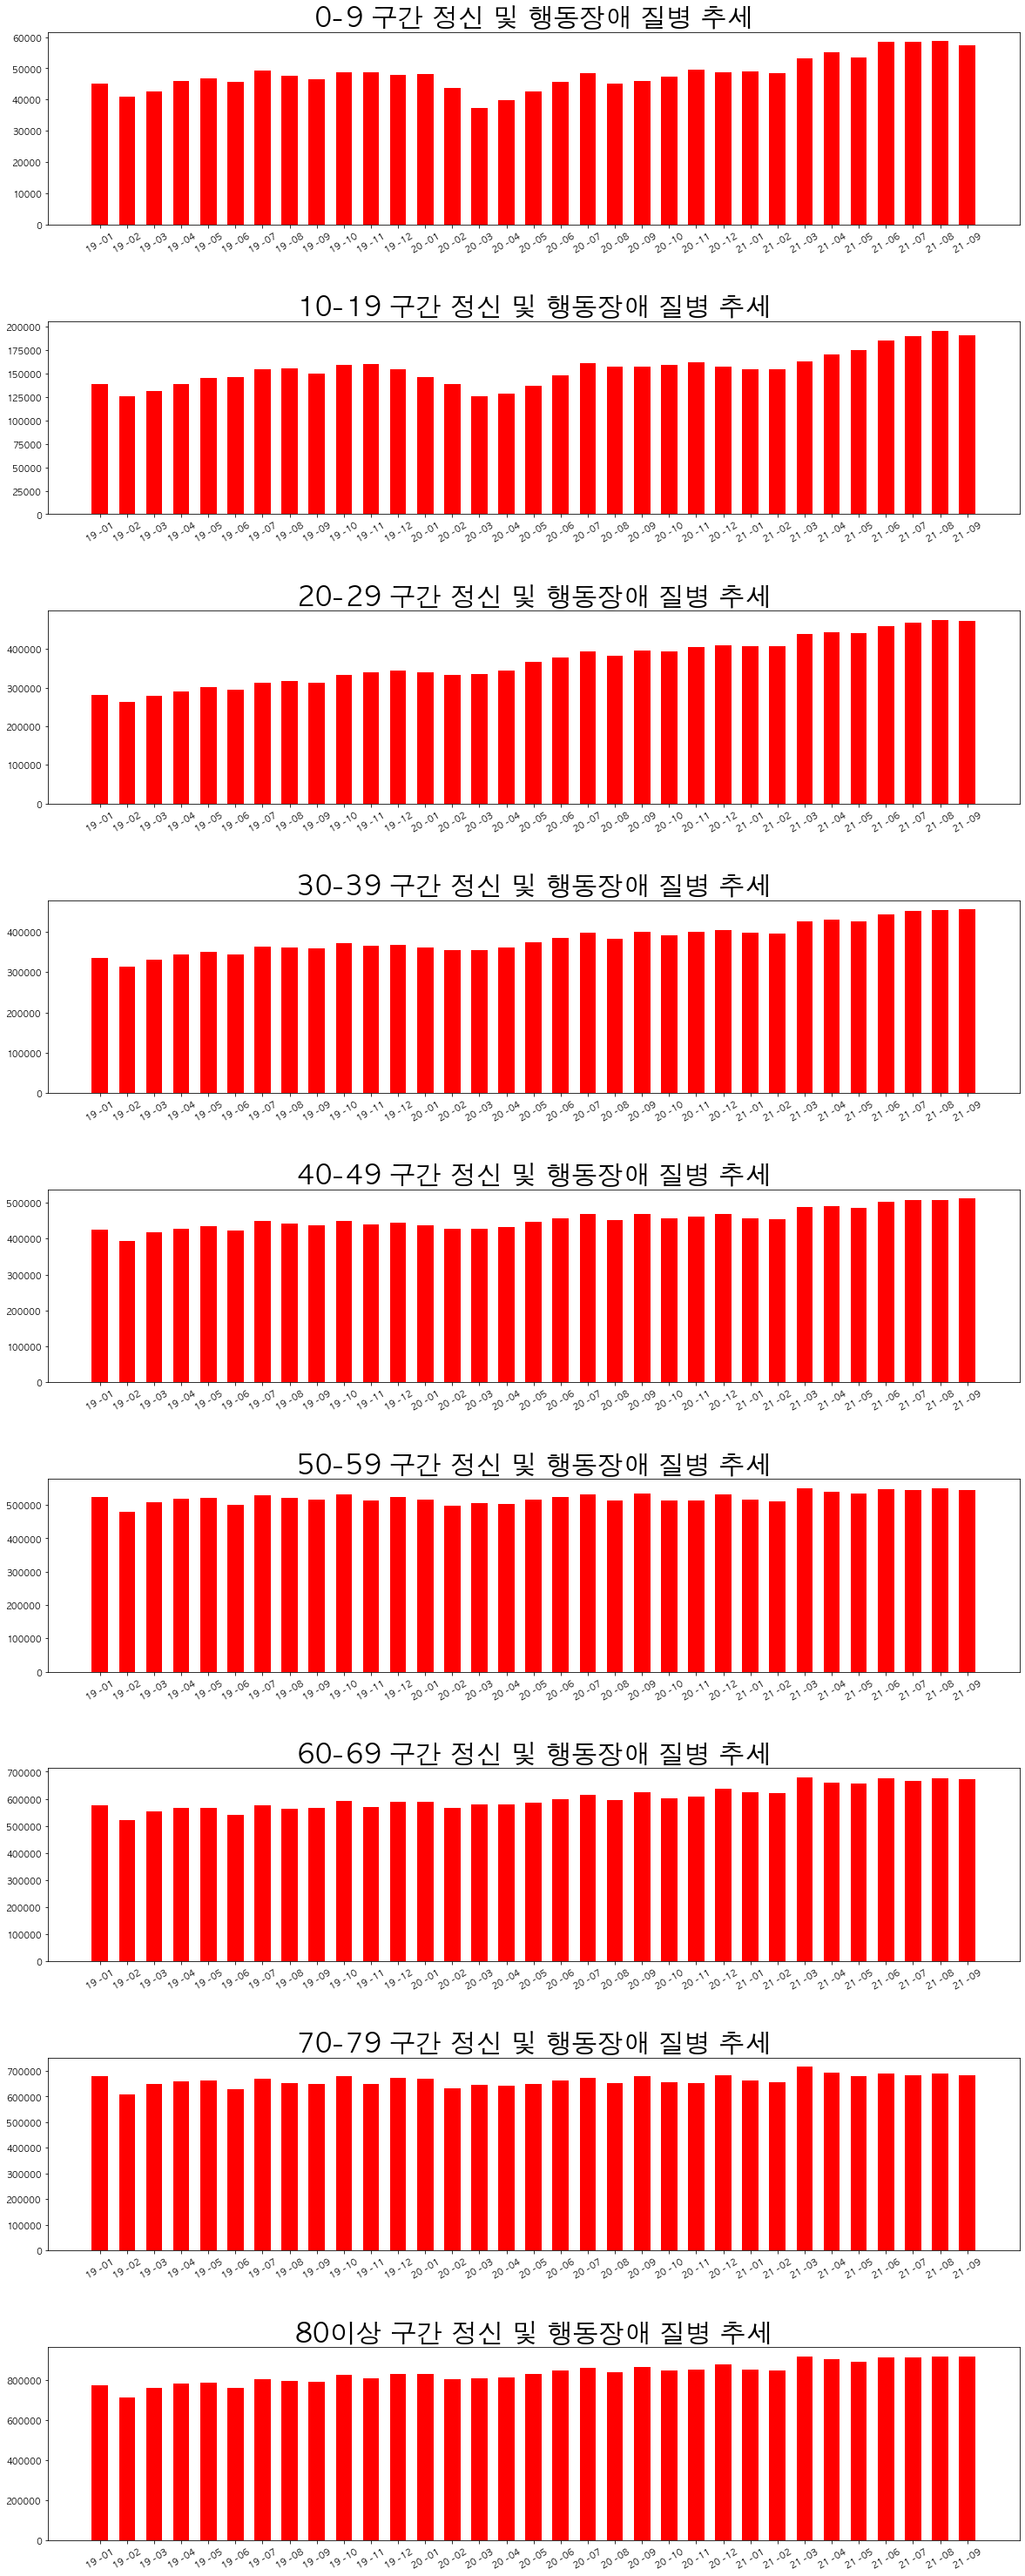

(9, 33)


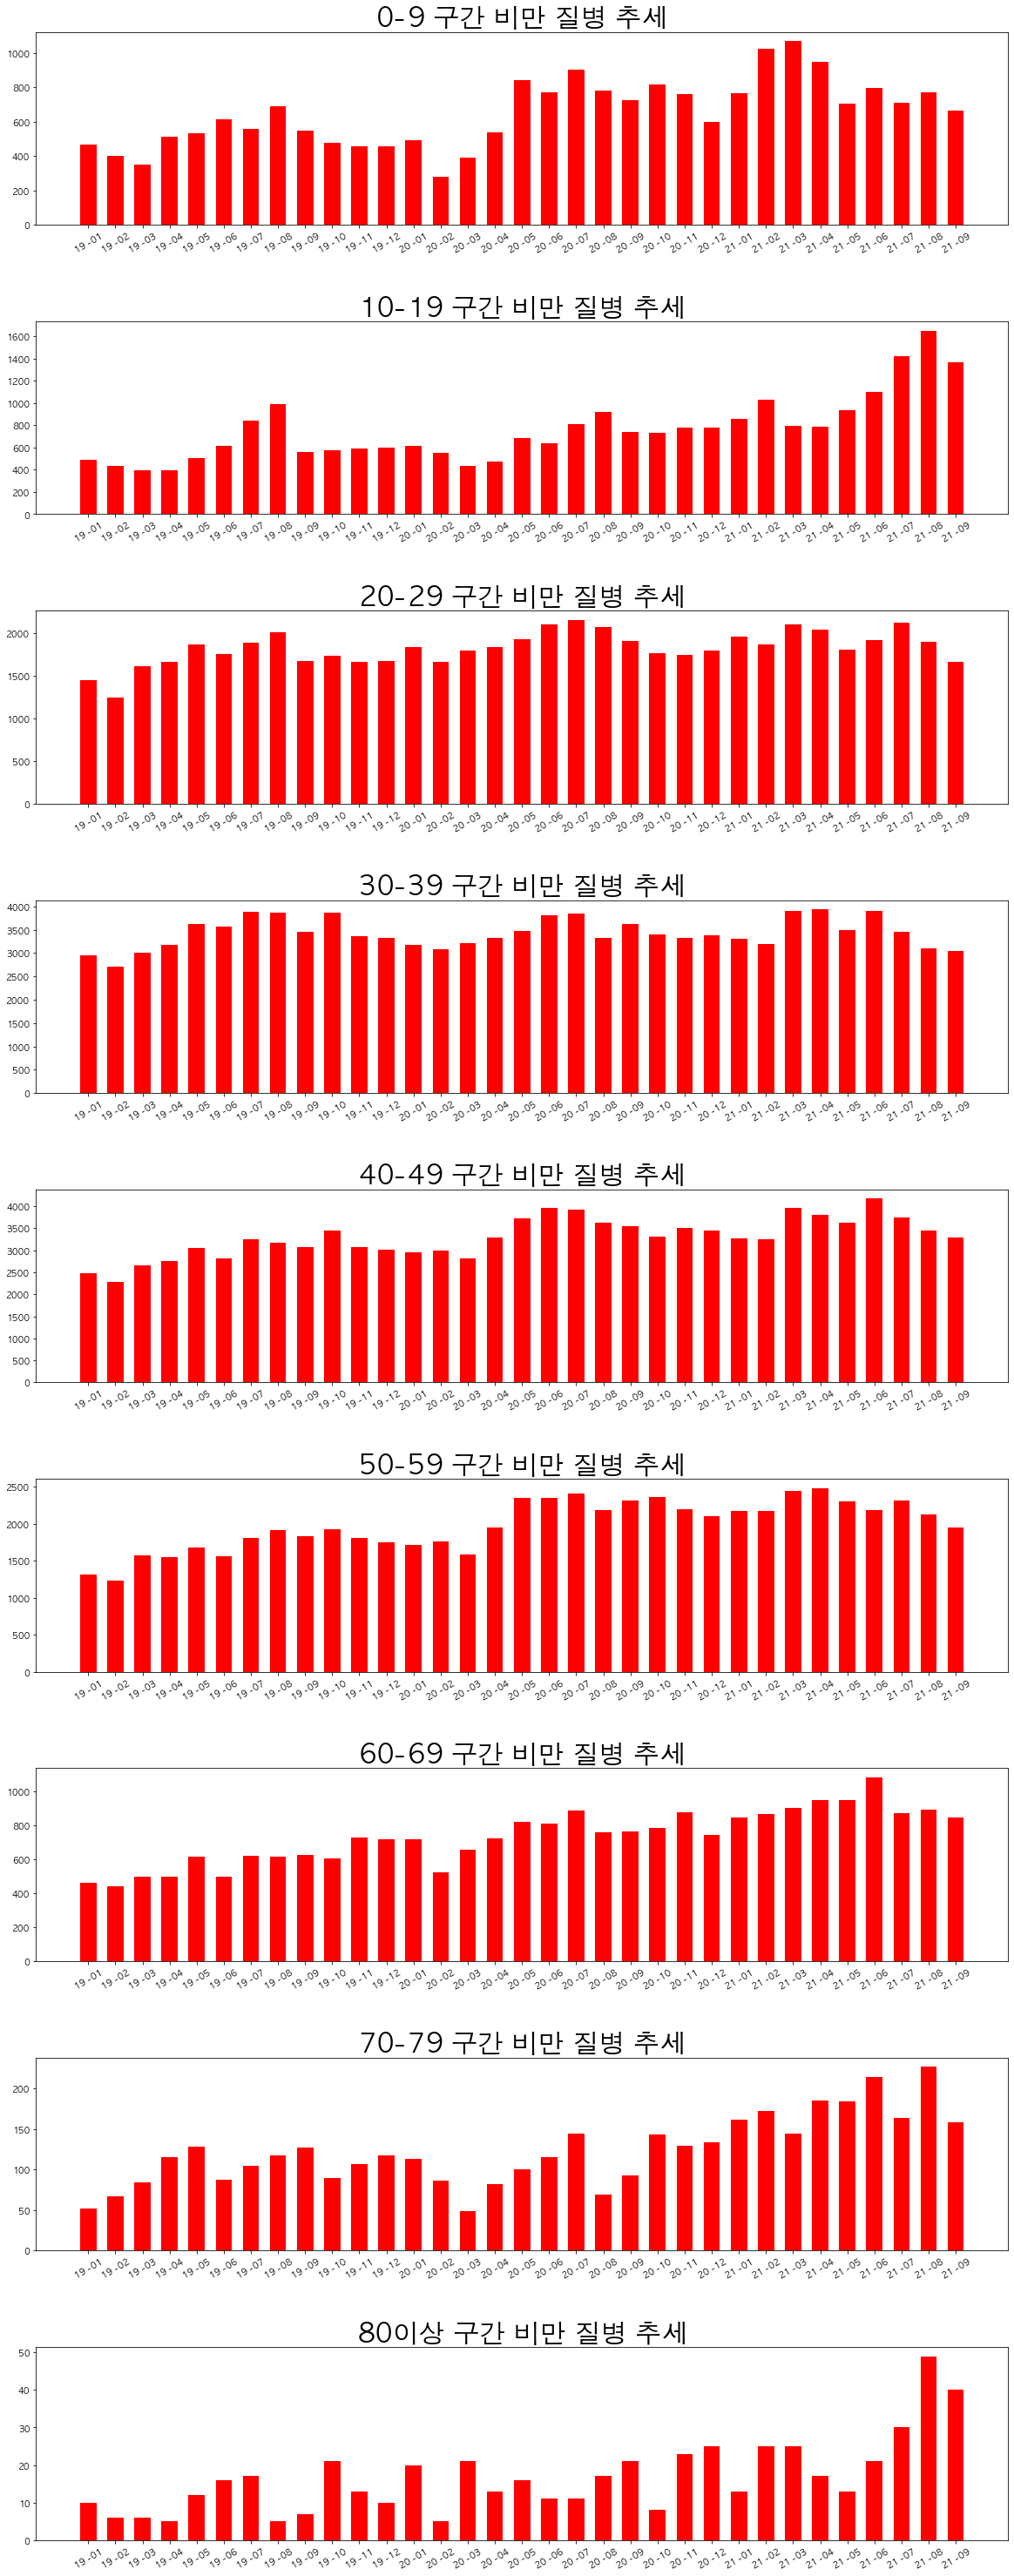

(9, 33)


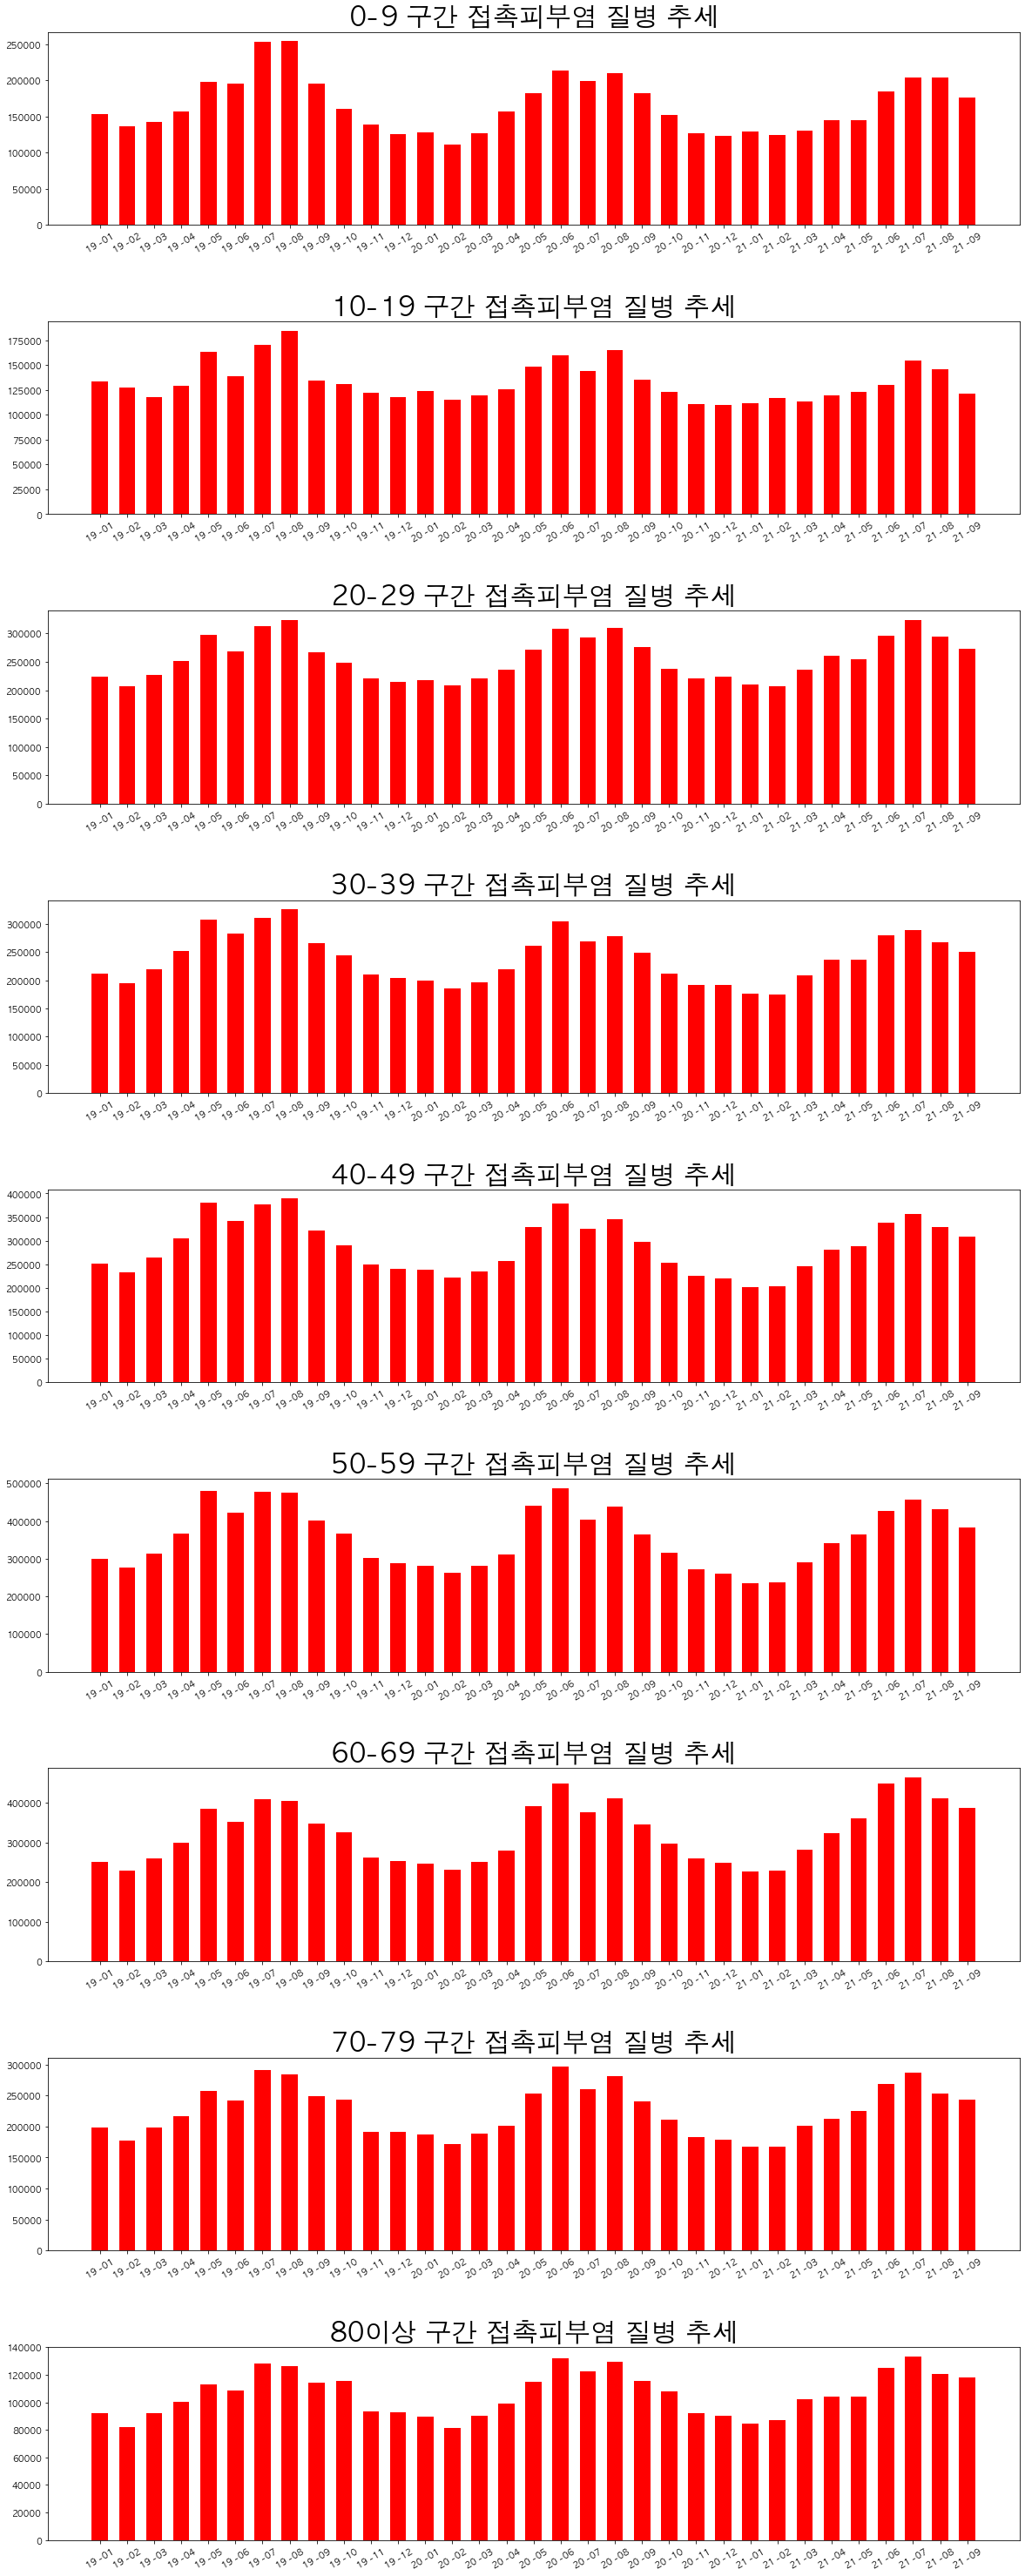

(9, 33)


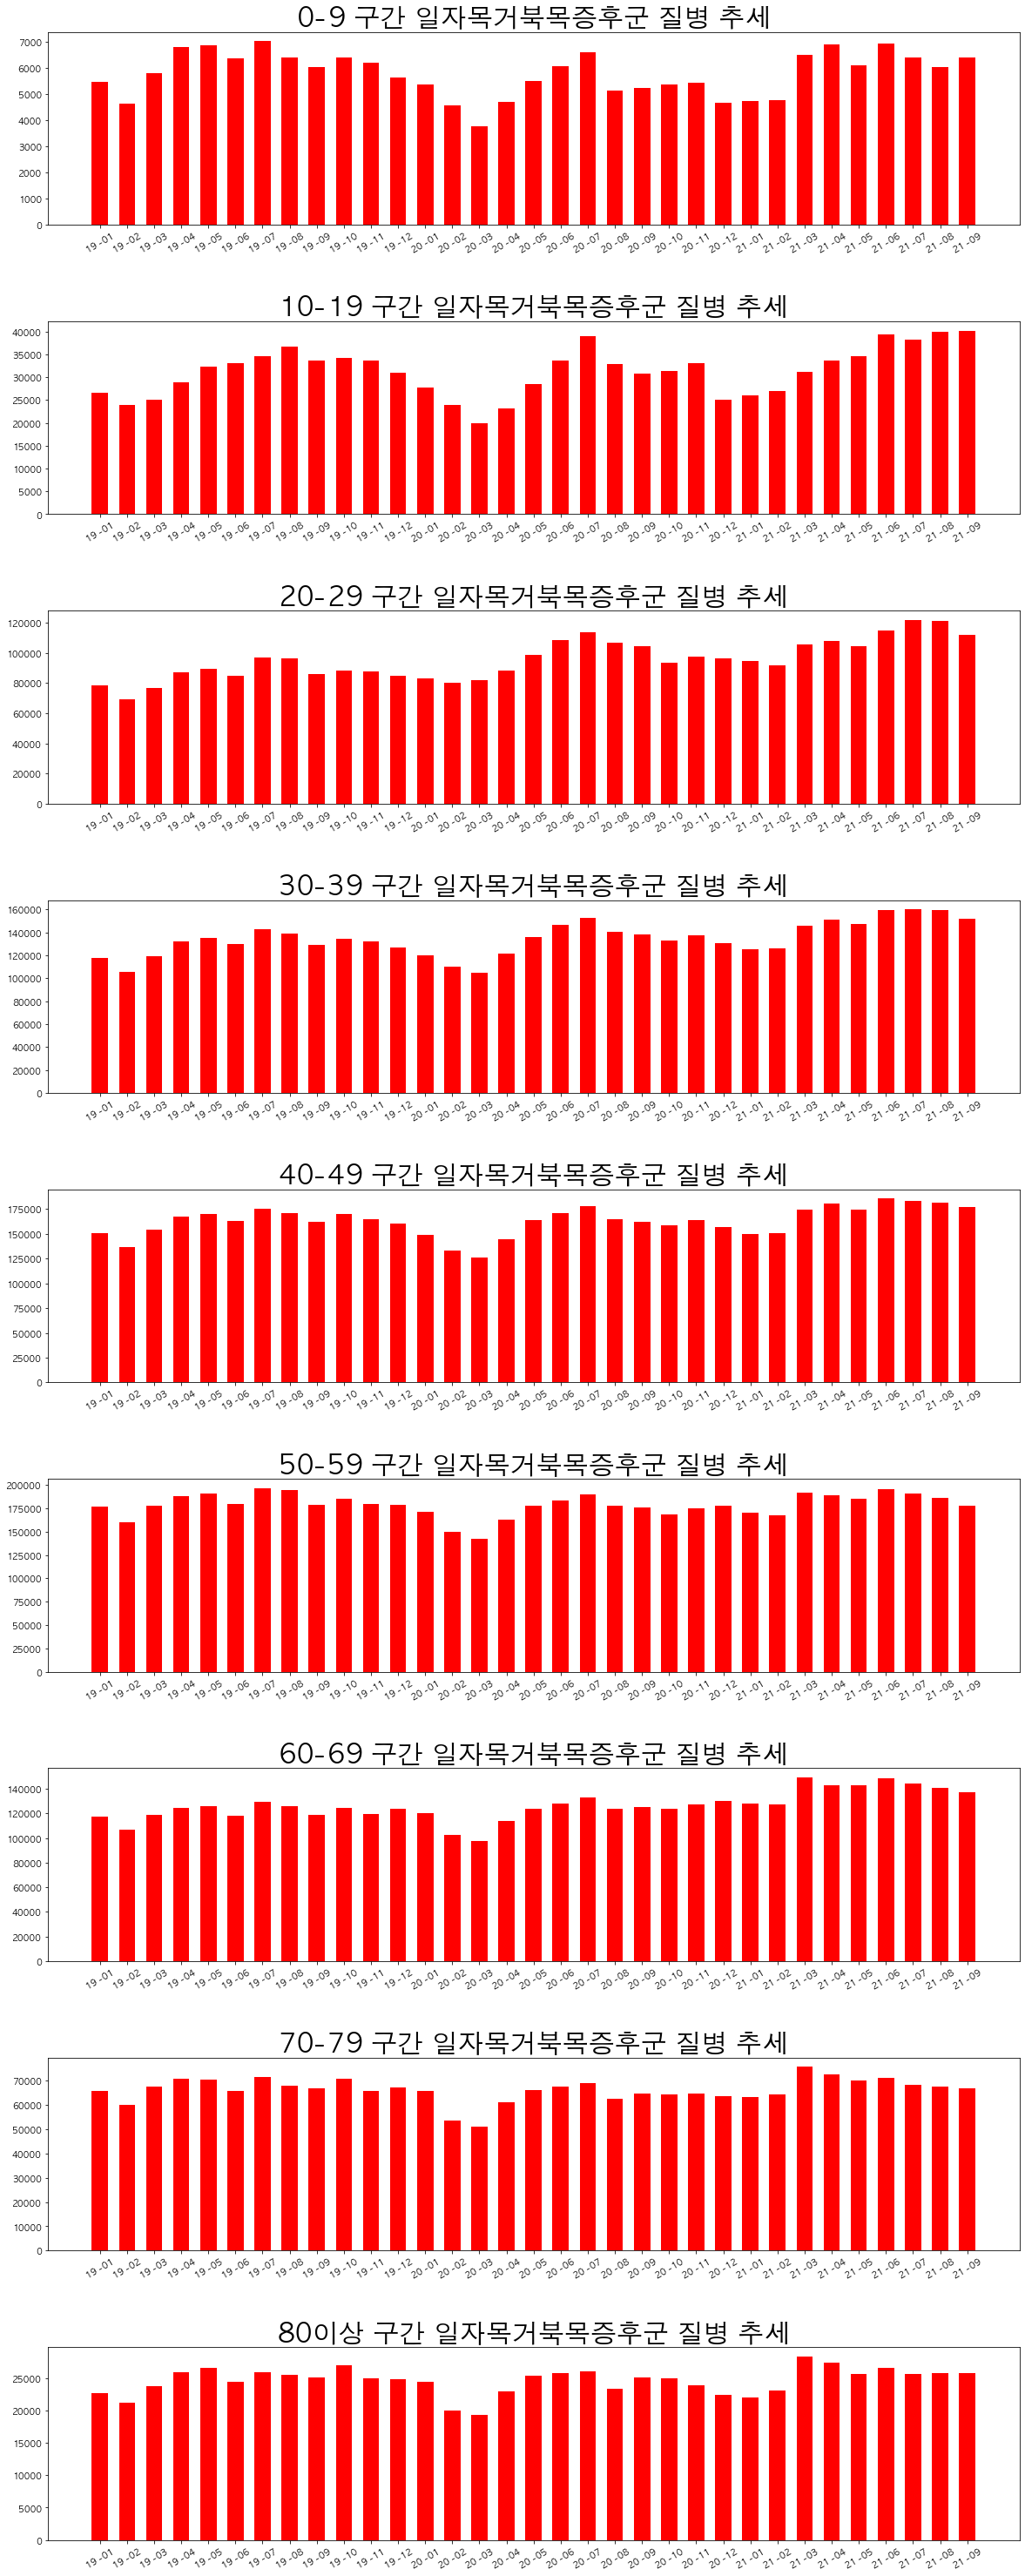

(9, 33)


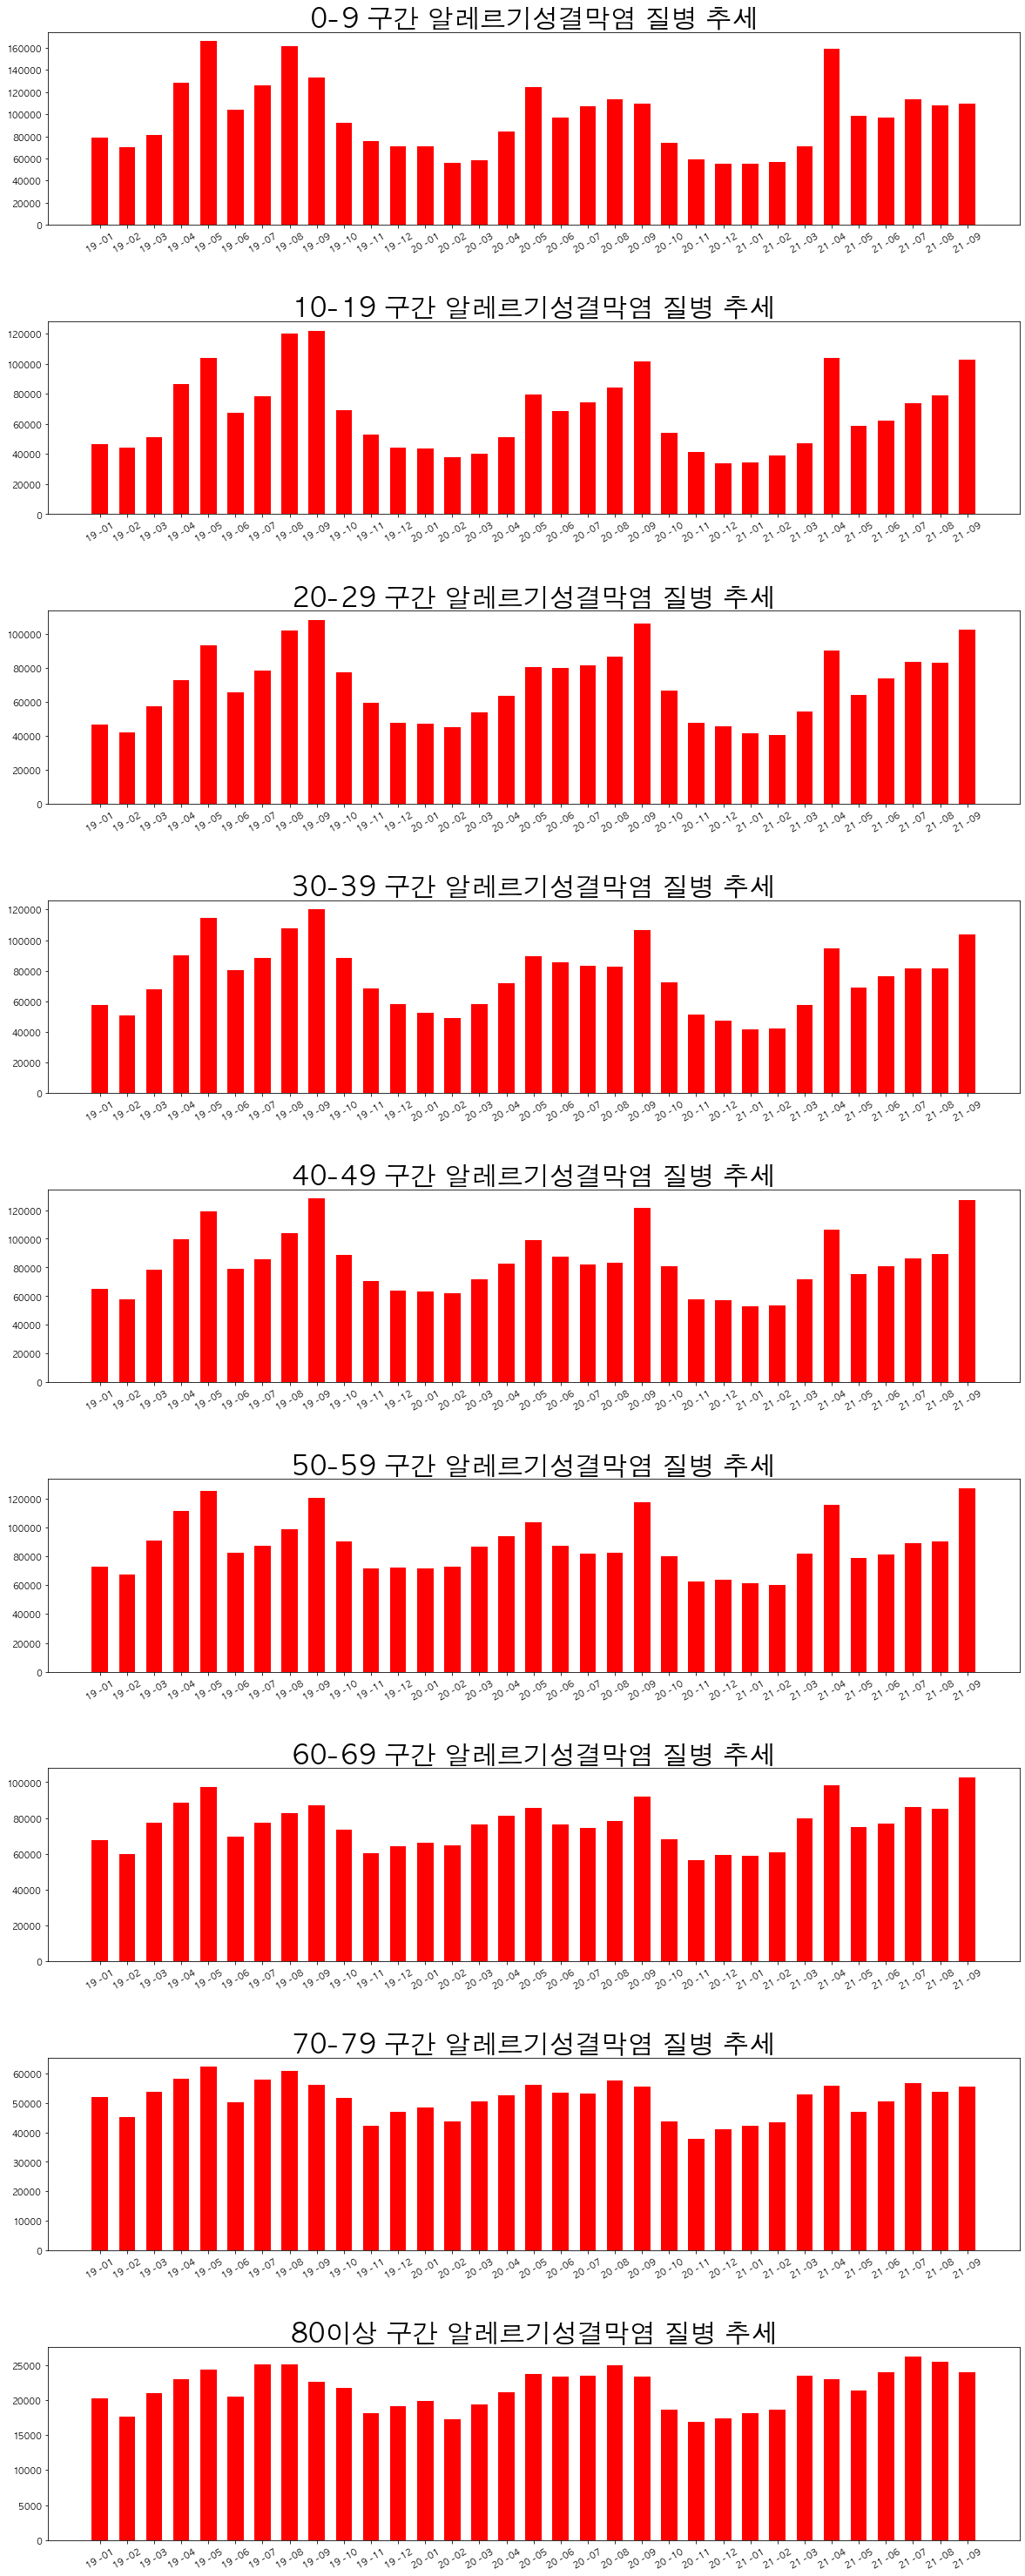

'\n머지..\n졸려서 이상한걸 분석했다\n-> 나이별 환자 수 총합\n'

In [13]:
'''
환자수 데이터
기간내 연령별 환자수 막대 그래프
'''

#print(patientData[a].values[:,:])
file_name = directory + datasetNames[0] + postfixName
print(file_name)
df = pd.read_excel(file_name, header=None)
#print(df.loc[7:, 3])
#print(patientData["감기"].values[:,:])

'''
0-9세 남성 2, 0-9세 여성 12
80세이상 남성 10, 80세 이상 여성 20

질병별
나이별로 추세 확인 (나이별 split point 9 * 질병 category size)

'''
ageSplit = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80이상"]

for a in datasetNames :
    temp = patientData[a].values[:,:]
    #print(temp)
    ageSplitData = list()

    for x in range(33) :
        for i in range(2, 11) :
            temp[i, x] += temp[i+10, x]

    ageSplitData = temp[2:11, :]
    print(ageSplitData.shape)


    n = 1
    plt.figure(figsize = (20,50))
    for i in range(len(ageSplit)) : 
        ax = plt.subplot(9, 1, n)
        ax.bar(np.arange(len(dataTimes)),ageSplitData[i,:], width=0.6, color = 'red')
        plt.xticks(np.arange(len(dataTimes)), [a[2:4]+" -"+a[6:8] for a in dataTimes], fontsize=10, rotation=30)
        ax.set_title(ageSplit[i] + " 구간 " + a + " 질병 추세", fontsize = 30)
        n+=1
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
    plt.show()

'''
머지..
졸려서 이상한걸 분석했다
-> 나이별 환자 수 총합
'''
# temp = np.sum(patientData["감기"].values[:,:], axis=1)
# print(temp)

# ageSplitData = list()
# for i in range(2, 11) :
#     ageSplitData.append(temp[i] + temp[i+10])
# print(ageSplitData)
